In [1]:
from random import random

def flip_coin():
    return 0 if random() < 0.5 else 1

In [104]:
import numpy as np

N_EXP = 100000
N_COINS = 1000
N_FLIPS = 10

coins = np.empty([N_COINS, N_FLIPS])
v = np.empty([N_EXP, 3])

In [105]:
for m in range(N_EXP):
    for i in range(N_COINS):
        for k in range(N_FLIPS):
            coins[i, k] = flip_coin()

    means = np.mean(coins, axis=1)

    v[m,0] = means[0]
    v[m,1] = means[int(N_COINS*random())]
    v[m,2] = min(means)

([array([    88.,    972.,   4354.,  11741.,  20617.,  24485.,  20426.,
          11750.,   4466.,    977.,    124.]),
  array([    92.,    947.,   4410.,  11792.,  20508.,  24649.,  20435.,
          11764.,   4345.,    962.,     96.]),
  array([  6.23410000e+04,   3.76580000e+04,   1.00000000e+00,
           0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
           0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
           0.00000000e+00,   0.00000000e+00])],
 array([ 0.        ,  0.09090909,  0.18181818,  0.27272727,  0.36363636,
         0.45454545,  0.54545455,  0.63636364,  0.72727273,  0.81818182,
         0.90909091,  1.        ]),
 <a list of 3 Lists of Patches objects>)

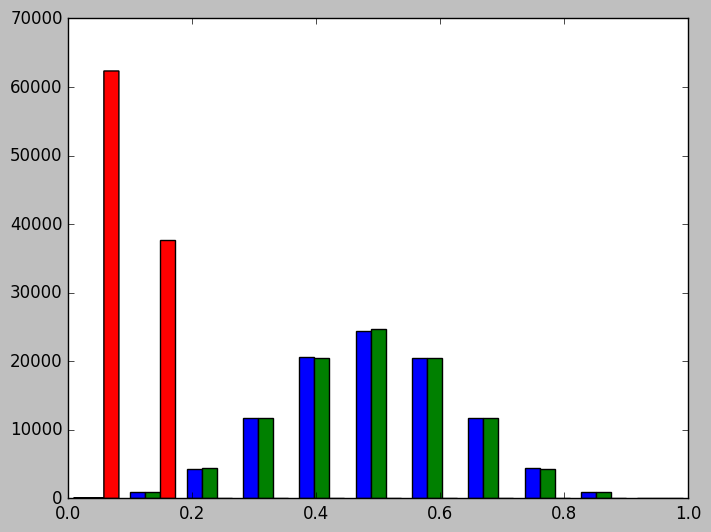

In [117]:
import matplotlib.pyplot as plt

plt.hist(v, bins=11)

In [178]:
est = np.empty([11, 3])
e = np.empty(11)

for i in range(11):
    e[i] = i/10
    est[i] = np.mean((abs(v-0.5) >= e[i]), axis=0)

In [207]:
# hoeffding bound
from math import exp 

e_hb = np.empty(101)
hb = np.empty(101)

for i in range(101):
    e_hb[i] = i / 100
    hb[i] = 2 * exp(-2 * pow(e_hb[i],2) * N_FLIPS)

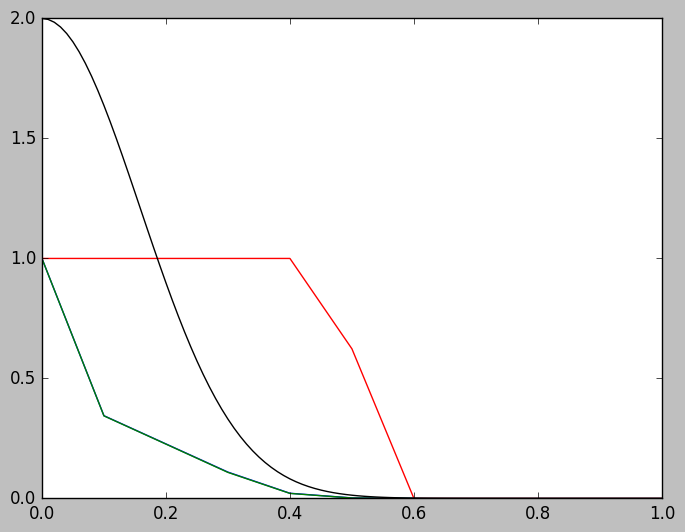

In [208]:
plt.plot(e, est)
plt.plot(e_hb, hb, 'k-') # plotting t,c separately 
plt.show()